In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

customerID - customer id

gender - client gender (male / female)

SeniorCitizen - is the client retired (1, 0)

Partner - is the client married (Yes, No)

tenure - how many months a person has been a client of the company

PhoneService - is the telephone service connected (Yes, No)

MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

InternetService - client's Internet service provider (DSL, Fiber optic, No)

OnlineSecurity - is the online security service connected (Yes, No, No internet service)

OnlineBackup - is the online backup service activated (Yes, No, No internet service)

DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

TechSupport - is the technical support service connected (Yes, No, No internet service)

StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)

Contract - type of customer contract (Month-to-month, One year, Two year)

PaperlessBilling - whether the client uses paperless billing (Yes, No)

PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - current monthly payment

TotalCharges - the total amount that the client paid for the services for the entire time

Churn - whether there was a churn (Yes or No)

In [52]:
df = pd.read_csv("../data/telecom_users.csv")

In [75]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_class
0,7010-BRBUU,Male,0,1,1,72,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0,old
1,9688-YGXVR,Female,0,0,0,44,1,No,Fiber optic,No,...,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.2,0,mid
2,9286-DOJGF,Female,1,1,0,38,1,Yes,Fiber optic,No,...,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1,mid
3,6994-KERXL,Male,0,0,0,4,1,No,DSL,No,...,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.5,0,new
4,2181-UAESM,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,Month-to-month,0,Electronic check,53.45,119.5,0,new


In [301]:
df['Partner'] = df['Partner'].astype('category').cat.codes
df['Dependents'] = df['Dependents'].astype('category').cat.codes
df['PhoneService'] = df['PhoneService'].astype('category').cat.codes
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes
df['Churn'] = df['Churn'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes

## 먼저 전체적인 상관관계를 확인하자

In [302]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
gender,1.000000,-0.007447,-0.007791,0.009083,0.003207,-0.004913,-0.013990,-0.014286,-0.009548
SeniorCitizen,-0.007447,1.000000,0.014867,-0.214233,0.005468,0.009464,0.155691,0.219387,0.150097
Partner,-0.007791,0.014867,1.000000,0.449029,0.381976,0.024926,-0.018037,0.104006,-0.146840
Dependents,0.009083,-0.214233,0.449029,1.000000,0.163710,-0.000579,-0.112405,-0.115803,-0.160204
tenure,0.003207,0.005468,0.381976,0.163710,1.000000,0.010392,0.006569,0.256983,-0.348469
PhoneService,-0.004913,0.009464,0.024926,-0.000579,0.010392,1.000000,0.021340,0.251029,0.009421
PaperlessBilling,-0.013990,0.155691,-0.018037,-0.112405,0.006569,0.021340,1.000000,0.355816,0.188996
MonthlyCharges,-0.014286,0.219387,0.104006,-0.115803,0.256983,0.251029,0.355816,1.000000,0.186753
Churn,-0.009548,0.150097,-0.146840,-0.160204,-0.348469,0.009421,0.188996,0.186753,1.000000


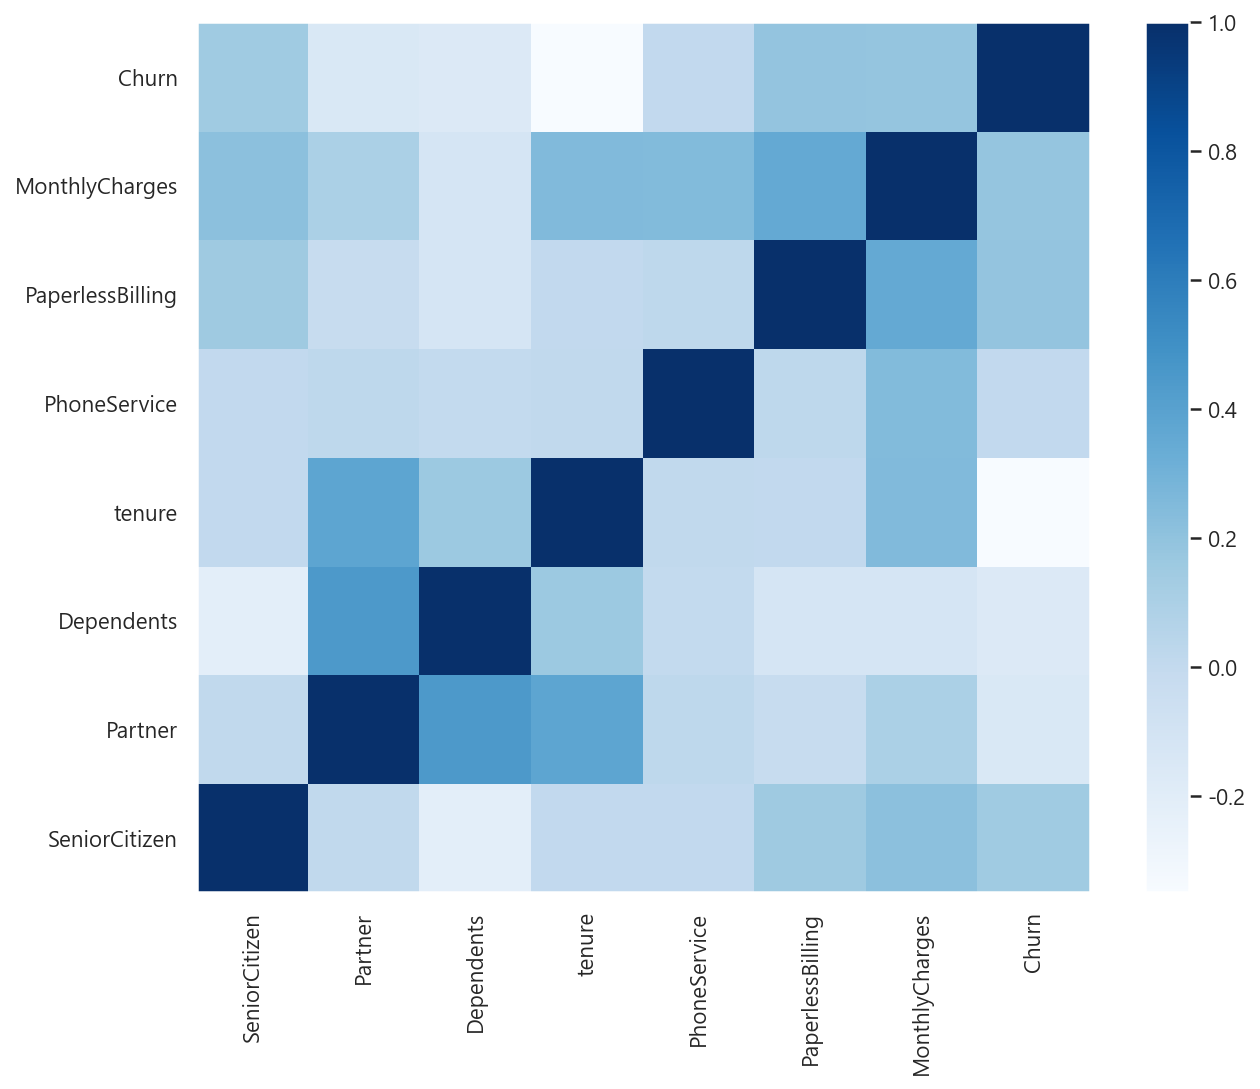

In [94]:
plt.figure(figsize=(10, 8))
plt.pcolor(df.corr(), cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(0.5, len(df.corr().columns), 1), df.corr().columns, rotation=90)
plt.yticks(np.arange(0.5, len(df.corr().index), 1), df.corr().index)
plt.show()

먼저 장기고객의 기준이 되는 tenure에 집중하자.

- 장기고객일수록 Parter(결혼여부), MonthlyCharges(월요금), Paperless Billing과 산관관계를 높게 가진다.

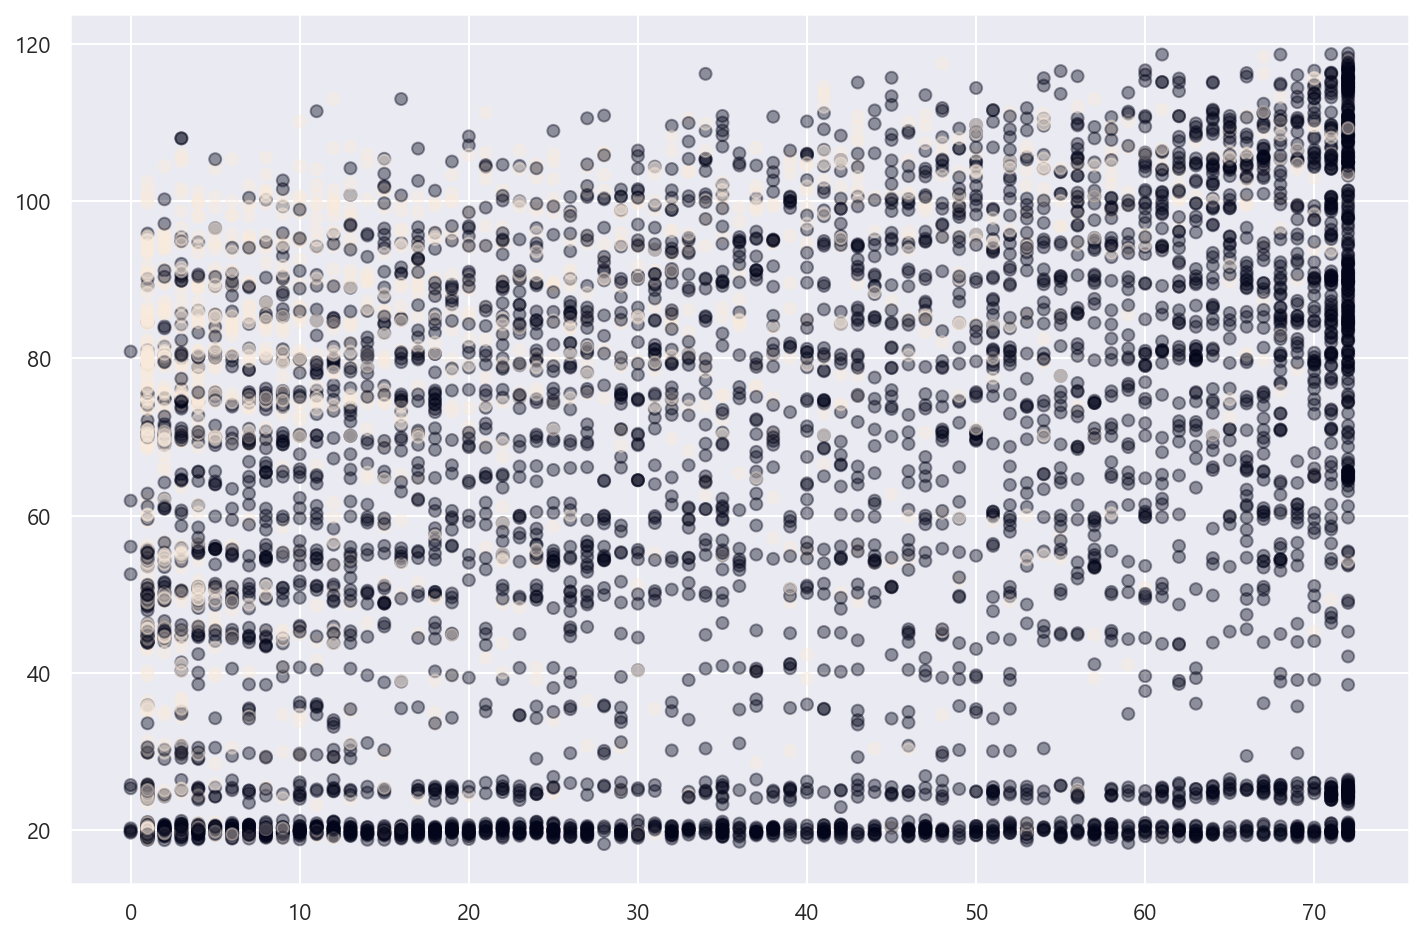

In [323]:
plt.figure(figsize=(12, 8))
plt.scatter(df.tenure, df.MonthlyCharges, c=df.Churn, alpha=0.4)

산점도를 그려 이탈 경험 여부를 시각화 한 결과 가입기간 20달 미만이면서 월 납부금액이 60달러 이상인 고객들에게 이탈 경험이 있다는 결과가 도출되었다.

해당 통신사는 신규 고객의 이탈을 방지하여 장기 고객으로 관리할 필요가 절실하며 위 이탈 경험 그룹에 대한 특별 정책이 필요할 것으로 판단됩니다.

## 통신사 고객이 얼마나 오랫동안 고객으로 지내왔는지 분포를 알아보자

(array([883., 474., 309., 331., 226., 264., 289., 182., 243., 185., 192.,
        232., 155., 229., 182., 237., 238., 199., 309., 627.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ,
        39.6, 43.2, 46.8, 50.4, 54. , 57.6, 61.2, 64.8, 68.4, 72. ]),
 <BarContainer object of 20 artists>)

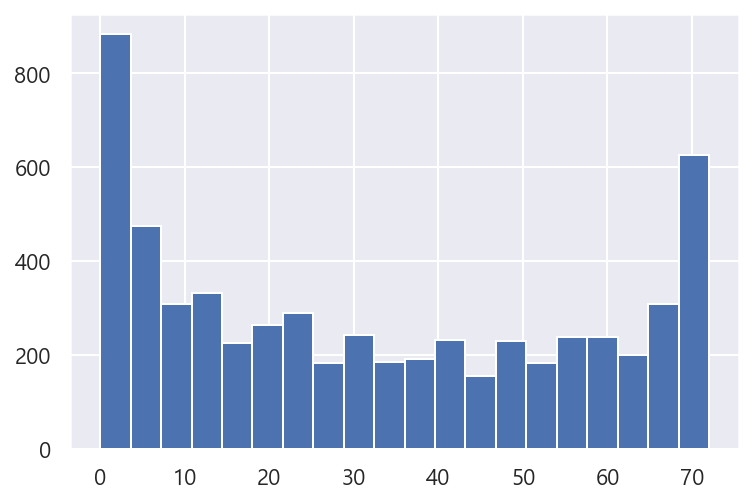

In [56]:
# tenure - how many months a person has been a client of the company

plt.hist(df.tenure, bins=20)

- 해당 통신사 고객의 가입 누적 월 수 분포를 확인한 결과 70개월 이상 가입한 장기고객이 많은 수준임을 알 수 있다.


- 또한 10개월 이전으로 갈수록 고객이 많아지는 것으로 보아 최근 10달간 신규 고객의 유입이 많았던 것이거나 신규유입은 많으나 10달 내에 이탈하는 고객이 많은 것으로 추측할 수 있다.

- 따라서 '신규 유입 층, 안정 층, 장기 고객 층' 으로 고객을 구분지볼 필요가 있다고 판단된다.

In [57]:
df['tenure_class'] = pd.cut(df['tenure'], 3, labels=['new' ,'mid', 'old'])

In [58]:
df['tenure_class'].value_counts()

new    2707
old    1905
mid    1374
Name: tenure_class, dtype: int64

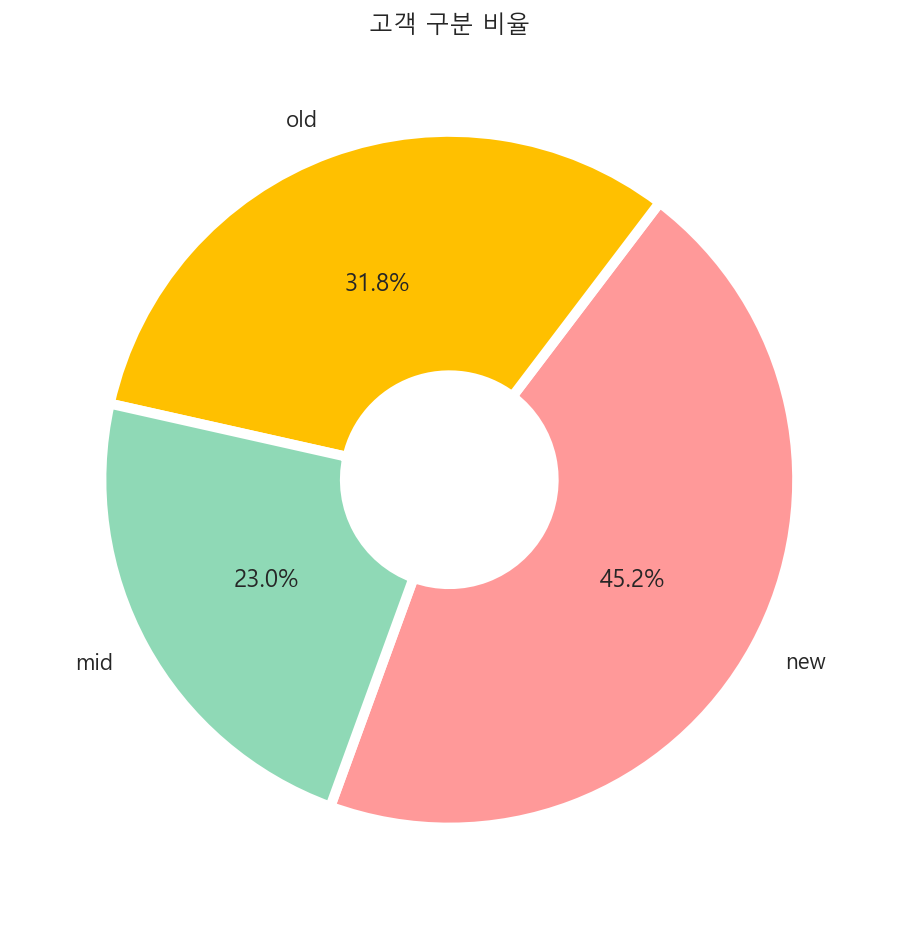

In [59]:
plt.figure(figsize=(12, 8))

plt.title('고객 구분 비율')
ratio = df.tenure_class.value_counts()
labels = ['new','old','mid']

colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=True,
       colors=colors, wedgeprops=wedgeprops)

plt.show()

신규 유입 고객은 약 45퍼센트로 이들이 중간 고객층으로 넘어가면 장기고객으로 이어질 가능성이 크다고 보인다.

하지만 이를 위해선 해당 통신사에서 신규 고객의 이탈을 방지하는 정책이 필요한것으로 파악된다.

In [99]:
new_cust = df.loc[df.tenure_class=='new']
mid_cust = df.loc[df.tenure_class=='mid']
old_cust = df.loc[df.tenure_class=='old']

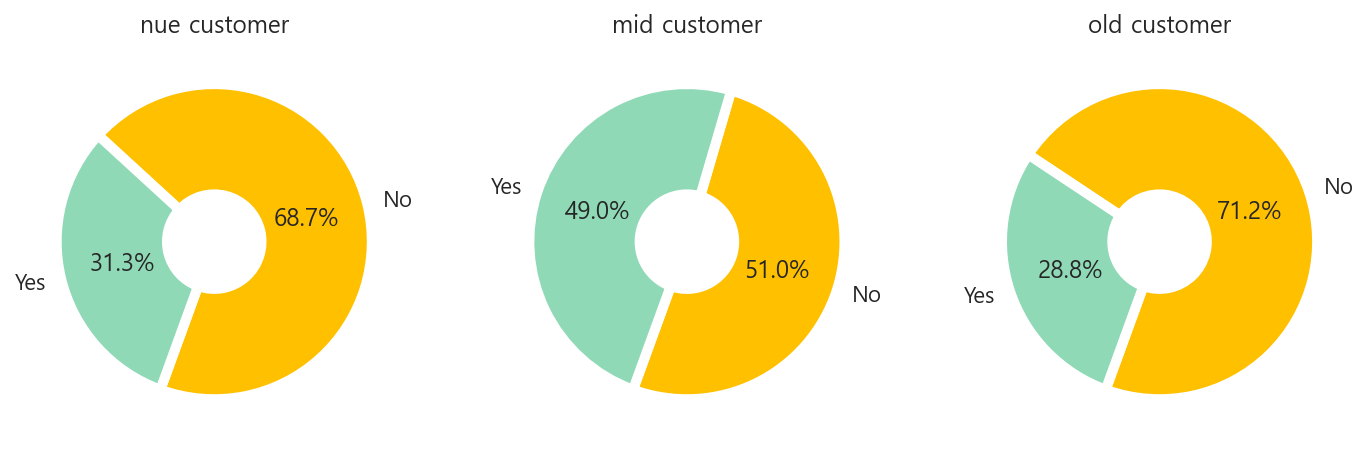

In [105]:
plt.figure(figsize=(12, 8))

plt.subplot(131)
plt.title('new customer')
ratio = new_cust.Partner.value_counts()
labels = ['No','Yes']

colors = ['#ffc000', '#8fd9b6']
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=True,
       colors=colors, wedgeprops=wedgeprops)

plt.subplot(132)
plt.title('mid customer')
ratio = mid_cust.Partner.value_counts()
labels = ['No','Yes']

colors = ['#ffc000', '#8fd9b6']
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=True,
       colors=colors, wedgeprops=wedgeprops)

plt.subplot(133)
plt.title('old customer')
ratio = old_cust.Partner.value_counts()
labels = ['No','Yes']

colors = ['#ffc000', '#8fd9b6']
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=True,
       colors=colors, wedgeprops=wedgeprops)

plt.show()

- 결혼 여부에 따른 각 고객층의 비율을 살펴보면 장기 고객일수록 기혼자인 경우가 많았다. 

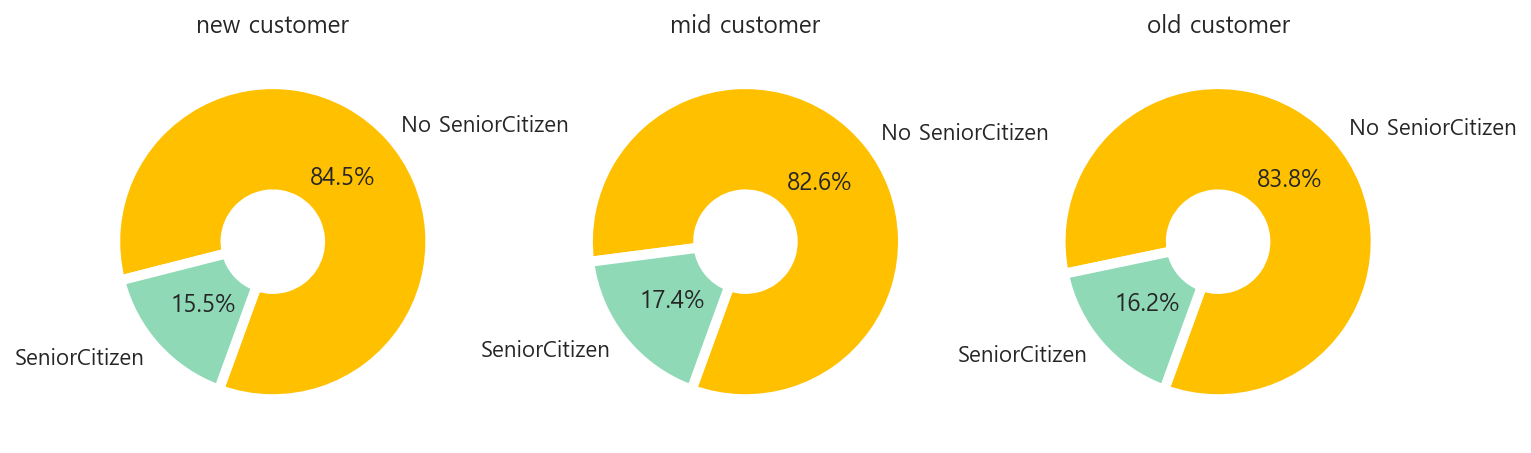

In [152]:
plt.figure(figsize=(12, 8))

plt.subplot(131)
plt.title('new customer')
ratio = new_cust.SeniorCitizen.value_counts()
labels = ['No SeniorCitizen','SeniorCitizen']

colors = ['#ffc000', '#8fd9b6']
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=True,
       colors=colors, wedgeprops=wedgeprops)

plt.subplot(132)
plt.title('mid customer')
ratio = mid_cust.SeniorCitizen.value_counts()
labels = ['No SeniorCitizen','SeniorCitizen']

colors = ['#ffc000', '#8fd9b6']
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=True,
       colors=colors, wedgeprops=wedgeprops)

plt.subplot(133)
plt.title('old customer')
ratio = old_cust.SeniorCitizen.value_counts()
labels = ['No SeniorCitizen','SeniorCitizen']

colors = ['#ffc000', '#8fd9b6']
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=True,
       colors=colors, wedgeprops=wedgeprops)

plt.show()

- 또한 모든 고객층에서 동일하게 아직 은퇴하지 않은 고객이 대분분임을 확인할 수 있다.

In [166]:
new_cust.PaperlessBilling.value_counts()

1    1597
0    1110
Name: PaperlessBilling, dtype: int64

In [154]:
mid_cust.PaperlessBilling.value_counts()

1    794
0    580
Name: PaperlessBilling, dtype: int64

In [155]:
old_cust.PaperlessBilling.value_counts()

1    1137
0     768
Name: PaperlessBilling, dtype: int64

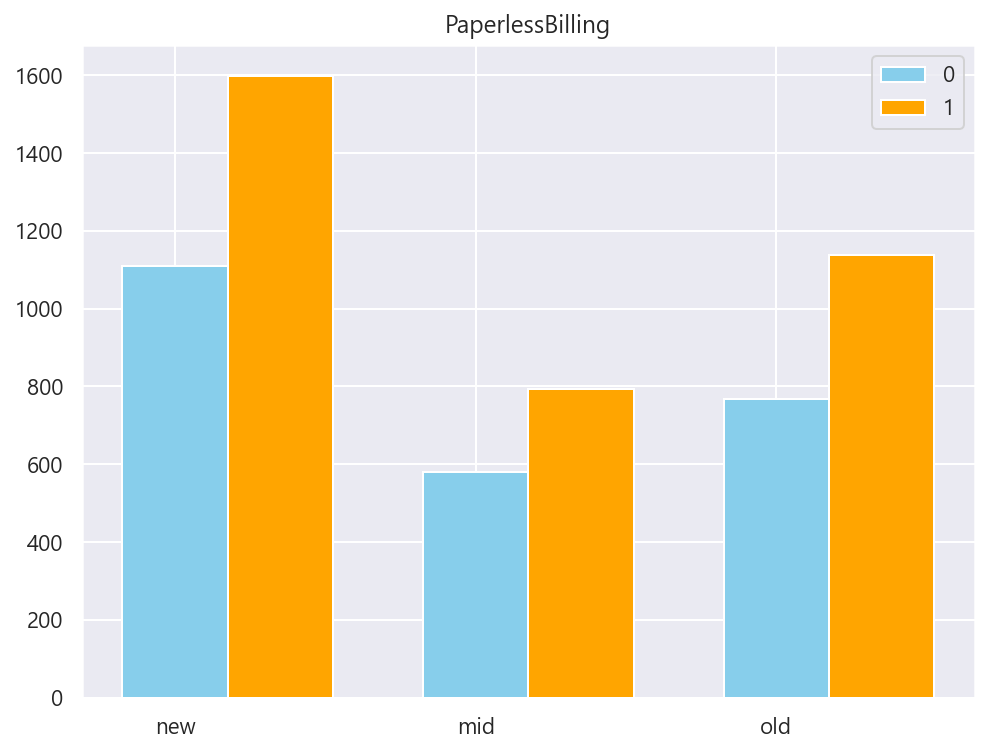

In [181]:
plt.figure(figsize=(8, 6))

plt.title('PaperlessBilling')

bar_width = 0.35

plt.bar(1, new_cust.PaperlessBilling.value_counts()[0], bar_width, label='0', color='skyblue')
plt.bar(1+ bar_width, new_cust.PaperlessBilling.value_counts()[1], bar_width, label='1', color='orange')

plt.bar(2, mid_cust.PaperlessBilling.value_counts()[0], bar_width, color='skyblue')
plt.bar(2+ bar_width, mid_cust.PaperlessBilling.value_counts()[1], bar_width, color='orange')

plt.bar(3, old_cust.PaperlessBilling.value_counts()[0], bar_width, color='skyblue')
plt.bar(3+ bar_width, old_cust.PaperlessBilling.value_counts()[1], bar_width, color='orange')

plt.xticks(np.arange(1,4), ['new','mid','old'])
plt.legend()
plt.show()

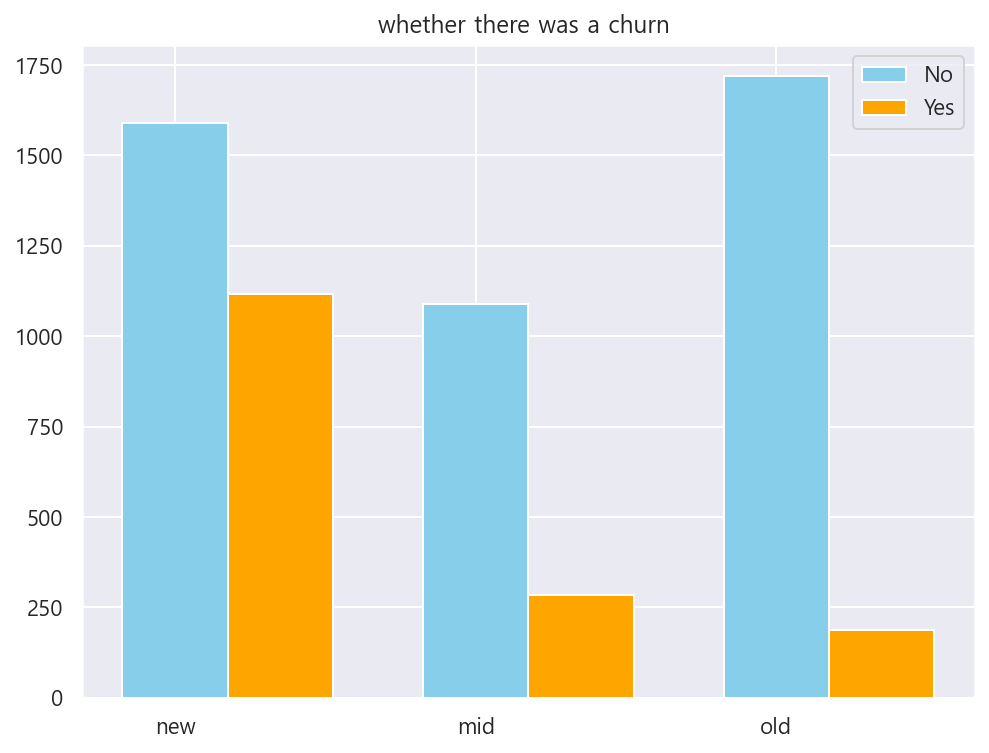

In [293]:
plt.figure(figsize=(8, 6))

plt.title('whether there was a churn ')

bar_width = 0.35

plt.bar(1, new_cust.Churn.value_counts()[0], bar_width, label='No', color='skyblue')
plt.bar(1+ bar_width, new_cust.Churn.value_counts()[1], bar_width, label='Yes', color='orange')

plt.bar(2, mid_cust.Churn.value_counts()[0], bar_width, color='skyblue')
plt.bar(2+ bar_width, mid_cust.Churn.value_counts()[1], bar_width, color='orange')

plt.bar(3, old_cust.Churn.value_counts()[0], bar_width, color='skyblue')
plt.bar(3+ bar_width, old_cust.Churn.value_counts()[1], bar_width, color='orange')

plt.xticks(np.arange(1,4), ['new','mid','old'])
plt.legend()
plt.show()

고객 이탈경험이 있는지에 대한 시각화를 진행한 결과 신규 유입층에서 Yes 라고 답한 경우가 상당히 많은 것을 확인했습니다.

In [281]:
new_cust.PaymentMethod.value_counts()

Electronic check             1138
Mailed check                  876
Bank transfer (automatic)     352
Credit card (automatic)       341
Name: PaymentMethod, dtype: int64

In [127]:
mid_cust.PaymentMethod.value_counts()

Electronic check             444
Credit card (automatic)      329
Bank transfer (automatic)    324
Mailed check                 277
Name: PaymentMethod, dtype: int64

In [128]:
old_cust.PaymentMethod.value_counts()

Credit card (automatic)      633
Bank transfer (automatic)    632
Electronic check             424
Mailed check                 216
Name: PaymentMethod, dtype: int64

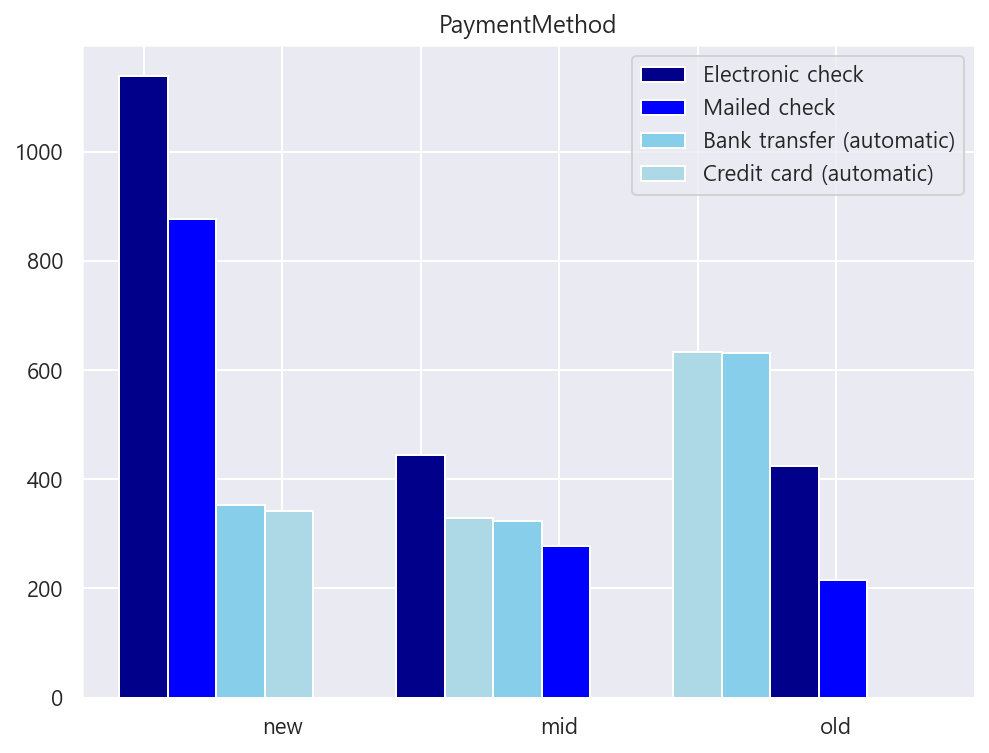

In [288]:
plt.figure(figsize=(8, 6))

plt.title('PaymentMethod')

bar_width = 0.35

plt.bar(1, new_cust.PaymentMethod.value_counts()[0], bar_width, color='darkblue', label='Electronic check')
plt.bar(1+bar_width, new_cust.PaymentMethod.value_counts()[1], bar_width, color='blue', label='Mailed check')
plt.bar(1+bar_width*2, new_cust.PaymentMethod.value_counts()[2], bar_width, color='skyblue', label='Bank transfer (automatic)')
plt.bar(1+bar_width*3, new_cust.PaymentMethod.value_counts()[3], bar_width, color='lightblue', label='Credit card (automatic)')

plt.bar(3, mid_cust.PaymentMethod.value_counts()[0], bar_width, color='darkblue')
plt.bar(3+bar_width, mid_cust.PaymentMethod.value_counts()[1], bar_width, color='lightblue')
plt.bar(3+bar_width*2, mid_cust.PaymentMethod.value_counts()[2], bar_width, color='skyblue')
plt.bar(3+bar_width*3, mid_cust.PaymentMethod.value_counts()[3], bar_width, color='blue')

plt.bar(5, old_cust.PaymentMethod.value_counts()[0], bar_width, color='lightblue')
plt.bar(5+bar_width, old_cust.PaymentMethod.value_counts()[1], bar_width, color='skyblue')
plt.bar(5+bar_width*2, old_cust.PaymentMethod.value_counts()[2], bar_width, color='darkblue')
plt.bar(5+bar_width*3, old_cust.PaymentMethod.value_counts()[3], bar_width, color='blue')


plt.xticks(np.arange(1,8), ["",'new',"",'mid',"",'old',""])
plt.legend()
plt.show()

- 고객층 별 선호 납부방식은 오래된 고객일수록 신용카드 자동이체 혹은 은행 자동이체와 같은 방식을 선호했다.
- 하지만 신규 진입층으로 갈수록 전자체크와 메일체크를 선호하는 것으로 확인된다.

In [130]:
new_cust.MultipleLines.value_counts()

No                  1707
Yes                  735
No phone service     265
Name: MultipleLines, dtype: int64

In [131]:
mid_cust.MultipleLines.value_counts()

Yes                 614
No                  610
No phone service    150
Name: MultipleLines, dtype: int64

In [132]:
old_cust.MultipleLines.value_counts()

Yes                 1199
No                   531
No phone service     175
Name: MultipleLines, dtype: int64

In [133]:
new_cust.StreamingTV.value_counts()

No                     1378
Yes                     689
No internet service     640
Name: StreamingTV, dtype: int64

In [135]:
mid_cust.StreamingTV.value_counts()

Yes                    561
No                     527
No internet service    286
Name: StreamingTV, dtype: int64

In [136]:
old_cust.StreamingTV.value_counts()

Yes                    1056
No                      484
No internet service     365
Name: StreamingTV, dtype: int64

In [137]:
new_cust.StreamingTV.value_counts()

No                     1378
Yes                     689
No internet service     640
Name: StreamingTV, dtype: int64

In [138]:
mid_cust.StreamingTV.value_counts()

Yes                    561
No                     527
No internet service    286
Name: StreamingTV, dtype: int64

In [139]:
old_cust.StreamingTV.value_counts()

Yes                    1056
No                      484
No internet service     365
Name: StreamingTV, dtype: int64

In [142]:
new_cust.Churn.value_counts()

0    1591
1    1116
Name: Churn, dtype: int64

In [143]:
mid_cust.Churn.value_counts()

0    1089
1     285
Name: Churn, dtype: int64

In [144]:
old_cust.Churn.value_counts()

0    1719
1     186
Name: Churn, dtype: int64

In [145]:
new_cust.OnlineSecurity.value_counts()

No                     1655
No internet service     640
Yes                     412
Name: OnlineSecurity, dtype: int64

In [146]:
mid_cust.OnlineSecurity.value_counts()

No                     679
Yes                    409
No internet service    286
Name: OnlineSecurity, dtype: int64

In [147]:
old_cust.OnlineSecurity.value_counts()

Yes                    892
No                     648
No internet service    365
Name: OnlineSecurity, dtype: int64

In [324]:
new_cust.StreamingTV.value_counts()

No                     1378
Yes                     689
No internet service     640
Name: StreamingTV, dtype: int64

In [325]:
new_cust.OnlineSecurity.value_counts()

No                     1655
No internet service     640
Yes                     412
Name: OnlineSecurity, dtype: int64

<BarContainer object of 1 artists>

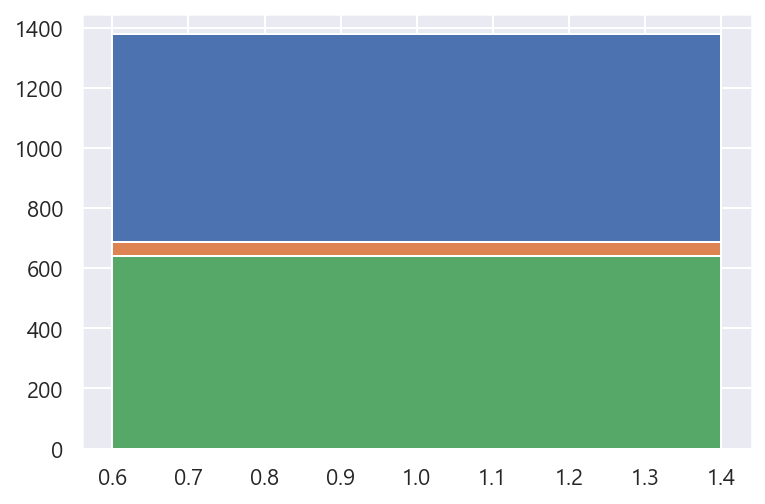

In [334]:
plt.bar(1, new_cust.StreamingTV.value_counts()[0])
plt.bar(1, new_cust.StreamingTV.value_counts()[1])
plt.bar(1, new_cust.StreamingTV.value_counts()[2])

In [ ]:
titanic.loc[(titanic['age'] > 10) & (titanic['age'] <= 16), 'age_clean'] = 1

In [358]:
df2 = df.loc[(df.tenure > 21) & (df.MonthlyCharges > 60)]

In [360]:
df2.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
gender,1.000000,-0.030581,0.016323,0.026127,-0.008250,-0.034679,-0.038457,-0.032637,-0.002717
SeniorCitizen,-0.030581,1.000000,0.001731,-0.230189,-0.072347,0.025456,0.109420,0.097930,0.121821
Partner,0.016323,0.001731,1.000000,0.376950,0.261782,-0.017475,-0.023301,0.041392,-0.086791
Dependents,0.026127,-0.230189,0.376950,1.000000,0.126261,-0.026557,-0.075370,-0.063723,-0.098908
tenure,-0.008250,-0.072347,0.261782,0.126261,1.000000,-0.106662,-0.026067,0.210441,-0.258301
PhoneService,-0.034679,0.025456,-0.017475,-0.026557,-0.106662,1.000000,0.021925,0.237296,0.063848
PaperlessBilling,-0.038457,0.109420,-0.023301,-0.075370,-0.026067,0.021925,1.000000,0.183610,0.125427
MonthlyCharges,-0.032637,0.097930,0.041392,-0.063723,0.210441,0.237296,0.183610,1.000000,0.108339
Churn,-0.002717,0.121821,-0.086791,-0.098908,-0.258301,0.063848,0.125427,0.108339,1.000000


In [364]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_class
1,9688-YGXVR,0,0,0,0,44,1,No,Fiber optic,No,...,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.2,0,mid
2,9286-DOJGF,0,1,1,0,38,1,Yes,Fiber optic,No,...,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1,mid
6,2495-KZNFB,0,0,0,0,33,1,Yes,Fiber optic,Yes,...,No,No,Yes,Month-to-month,1,Electronic check,90.65,2989.6,0,mid
9,8016-NCFVO,1,1,0,0,55,1,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Month-to-month,1,Electronic check,116.50,6382.55,0,old
10,4578-PHJYZ,1,0,1,1,52,1,No,DSL,No,...,Yes,Yes,No,One year,1,Electronic check,68.75,3482.85,0,old


<AxesSubplot:title={'center':'OnlineSecurity'}>

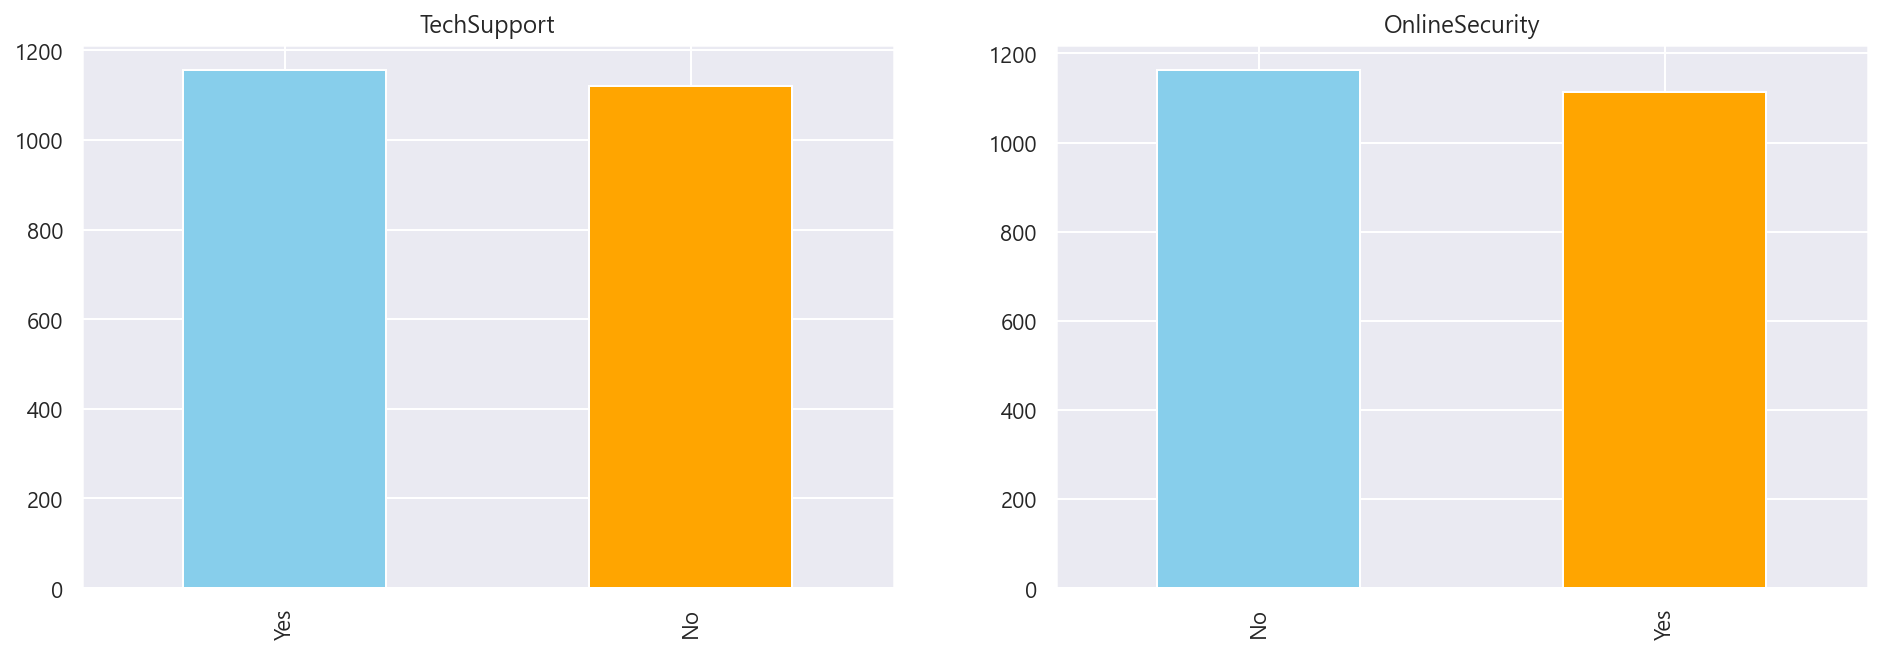

In [404]:
plt.figure(figsize=(16, 5))
colors = ['skyblue', 'orange']
plt.subplot(121)
plt.title('TechSupport')
df2.TechSupport.value_counts().plot(kind='bar', color=colors)

plt.subplot(122)
plt.title('OnlineSecurity')
df2.OnlineSecurity.value_counts().plot(kind='bar', color=colors)

해당 그룹에게 제공되고 있는 서비스를 시각화 한 결과입니다.

현재 이탈경험이 있는 고객 그룹은 기술적 지원을 받지 않는 경우가 거의 절반에 육박하며 Online Security 또한 연결되지 않은 고객은 절반을 넘습니다.

따라서 위 고객의 이탈을 방지하기 위해선 위 두가지 지원에 대한 정책을 검토할 필요가 있다고 판단됩니다.

In [408]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_class
0,7010-BRBUU,1,0,1,1,72,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0,old
1,9688-YGXVR,0,0,0,0,44,1,No,Fiber optic,No,...,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.2,0,mid
2,9286-DOJGF,0,1,1,0,38,1,Yes,Fiber optic,No,...,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1,mid
3,6994-KERXL,1,0,0,0,4,1,No,DSL,No,...,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.5,0,new
4,2181-UAESM,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,Month-to-month,0,Electronic check,53.45,119.5,0,new


In [407]:
df.groupby('tenure_class')['Churn'].mean()

tenure_class
new    0.412264
mid    0.207424
old    0.097638
Name: Churn, dtype: float64

Text(0.5, 0, '이탈 가능성')

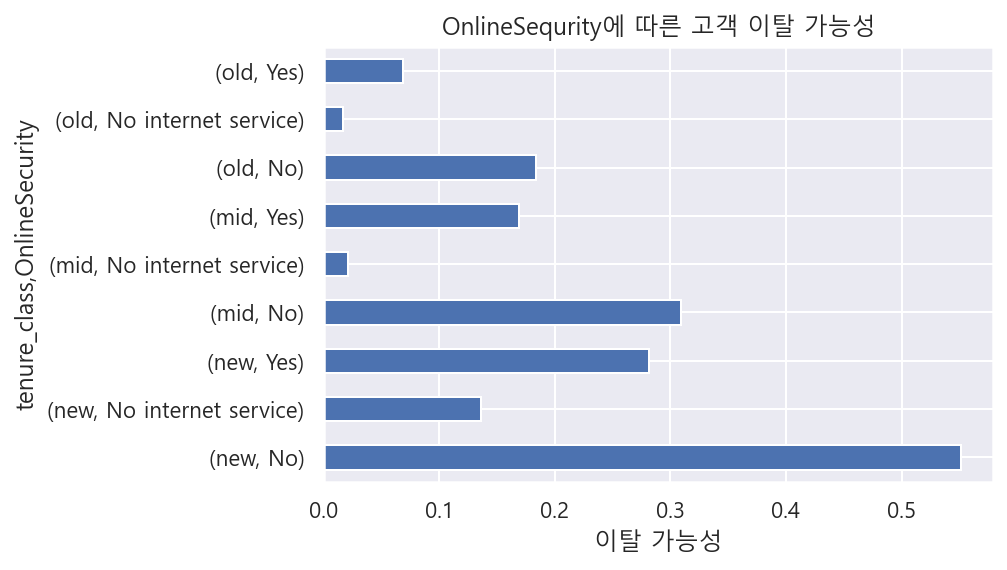

In [426]:
plt.title("OnlineSequrity에 따른 고객 이탈 가능성")
df.groupby(['tenure_class','OnlineSecurity',])['Churn'].mean().plot(kind='barh')
plt.xlabel('이탈 가능성')

Text(0.5, 0, '이탈 가능성')

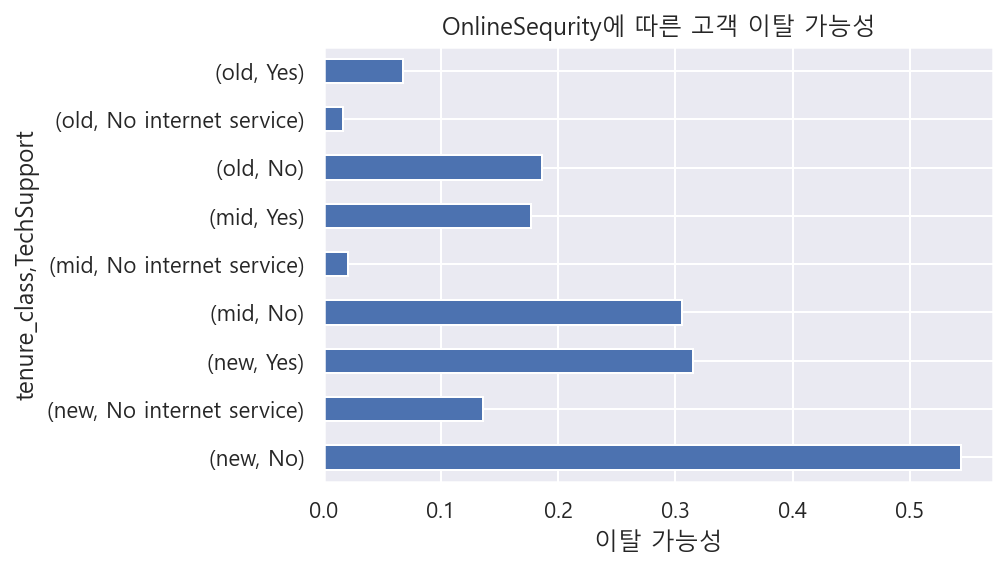

In [427]:
plt.title("OnlineSequrity에 따른 고객 이탈 가능성")
df.groupby(['tenure_class','TechSupport'])['Churn'].mean().plot(kind='barh')
plt.xlabel('이탈 가능성')